# Information on currently available OpSim runs

- See http://astro-lsst-01.astro.washington.edu:8080/ for full MAF output.
- See https://github.com/lsst-pst/survey_strategy/blob/master/WPruns/comparisons/AlternateStrategiesComparison.md for additional comaprisons of available runs.

| Run name                | Note                          |
| ------------------------| -------------------------------|
| baseline2018a | Current opsimv4 baseline                         |
| kraken_2026   | Python 3 baseline2018a replacement (with dome crawl and OL)  |
| colossus_2665 | Python 3 baseline2018a replacement (with dome crawl and OL), WFD area increased by 1.5 degrees north an south  |
| pontus_2002   | Simulation of a PanSTARRs like survey                        |
| colossus_2664 | WFD cadence in GP. GP proposal turned off                                                  |
| colossus_2667 | Single visits per night survey                                                                            |
| pontus_2489   | "Many visits" 20s visits with single snap, 40s visits in u band                         |
| kraken_2035   | 9 Deep Drilling Fields (DDFs), 4 already decided + 5 additional                            |
| mothra_2045   | 2 alternating Dec bands switched every other year, WFD off                                 |
| pontus_2502   | 2 alternating Dec bands switched every other year, WFD on at 25% level                     |
| kraken_2036   | Full WFD first and last 2 years, 3 alternating dec bands in between                        |
| kraken_2042   | Single 30 second snaps in all filters                        |
| kraken_2044   | Simulation of a PanSTARRs like survey, no pairs             |
| mothra_2049   | Simulation of a PanSTARRs like survey, 2 alternating Dec bands switched every other year              |
| nexus_2097    | Simulation of a PanSTARRs like survey, Full WFD first and last 2 years, 3 alternating dec bands in between              |
| astro-lsst-01_2039| No North Ecliptic Spur (NES) proposal|

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import lsst.syseng.throughputs as st
import lsst.sims.maf.db as db
import lsst.sims.maf.runComparison as rc

/astro/users/oboberg/userRepos/sims_maf/python/lsst/sims/maf/runComparison/runComparison.py:25: UserWarning: 
The generateDiffHtml method requires bokeh to be installed
but it is not needed to use the other methods in this class.
Run: pip install bokeh then restart your jupyter notebook kernel.
  'Run: pip install bokeh then restart your jupyter notebook kernel.')


In [2]:
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
filtercolors = {'u':'b', 'g':'c', 'r':'g',
                'i':'y', 'z':'r', 'y':'m'}

In [3]:
runlist = ['baseline2018a', 'kraken_2026', 'colossus_2665',  
           'colossus_2664', 'astro-lsst-01_2039','colossus_2667', 'pontus_2489', 'kraken_2042', 'kraken_2035',
           'mothra_2045', 'pontus_2502', 'kraken_2036', 'pontus_2002', 'kraken_2044',
           'mothra_2049', 'nexus_2097']
rundirs = [r + '/all_combine' for r in runlist]
r = rc.RunComparison(baseDir='.', runlist=runlist, rundirs=rundirs)

### Total visits

In [4]:
m = r.buildMetricDict(metricNameLike='Nvisits', metricMetadataLike='All props', slicerNameLike='Unislicer')
r.addSummaryStats(m)

1.07012050584


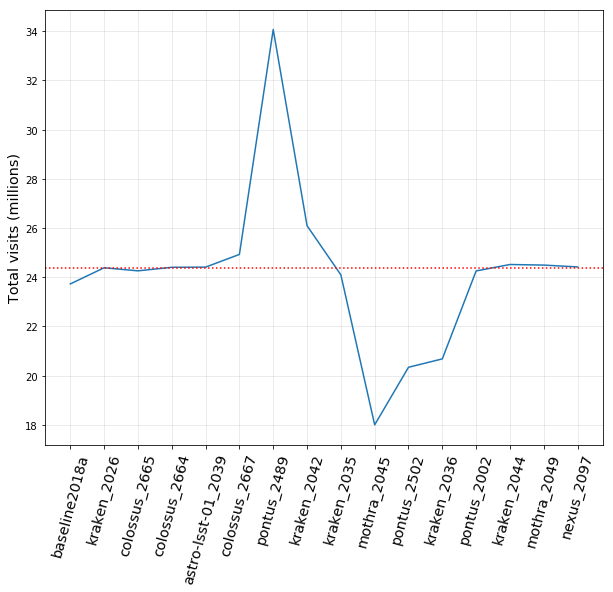

In [5]:
plt.figure(figsize=(10, 8))
rx = np.arange(len(r.runlist))
plt.plot(rx, r.summaryStats['Nvisits All props']/100000)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Total visits (millions)", fontsize='x-large')
base = r.summaryStats['Nvisits All props']['kraken_2026']/100000
plt.axhline(base, color='r', linestyle=':')
plt.grid(True, alpha=0.3)

print(r.summaryStats['Nvisits All props']['kraken_2042']/r.summaryStats['Nvisits All props']['kraken_2026'])

### CoaddM5 in WFD

In [6]:
for f in filterlist:
    metadata = 'WFD %s band' % f
    m = r.buildMetricDict(metricNameLike='CoaddM5',  metricMetadataLike=metadata)
    r.addSummaryStats(m)

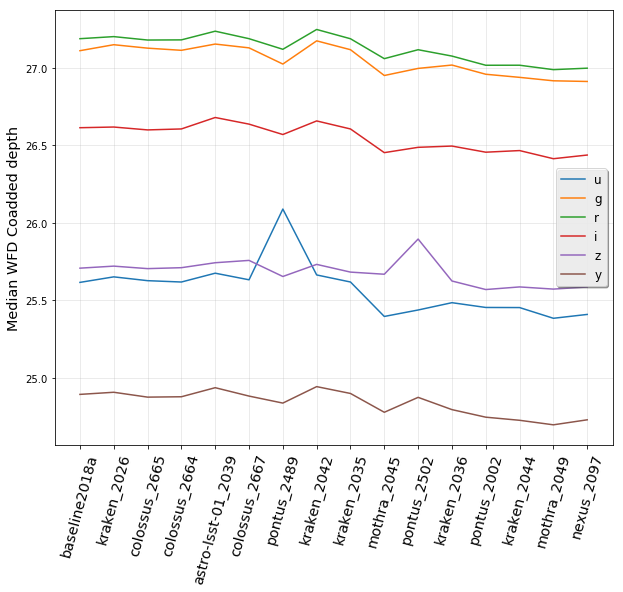

In [7]:
plt.figure(figsize=(10, 8))
for f in filterlist:
    metadata = 'WFD %s band' % f
    s = r.summaryStats['Median CoaddM5 %s HealpixSlicer' % metadata]
    plt.plot(rx, s, label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Median WFD Coadded depth", fontsize='x-large')
plt.legend(loc='right', fancybox=True, shadow=True, fontsize='large')
#base = r.summaryStats['Nvisits All props']['kraken_2026']/100000
#plt.axhline(base, color='r', linestyle=':')
plt.grid(True, alpha=0.3)

### fO in WFD

In [8]:
# SRD metrics:
m = r.buildMetricDict(metricNameLike='fO', metricMetadataLike='WFD')
r.addSummaryStats(m)

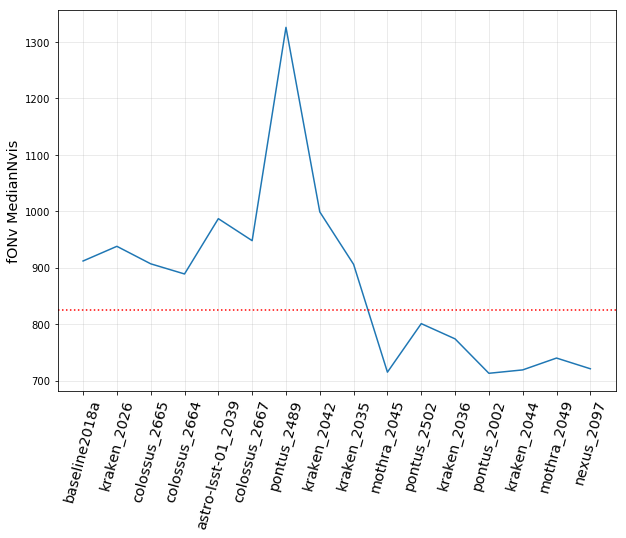

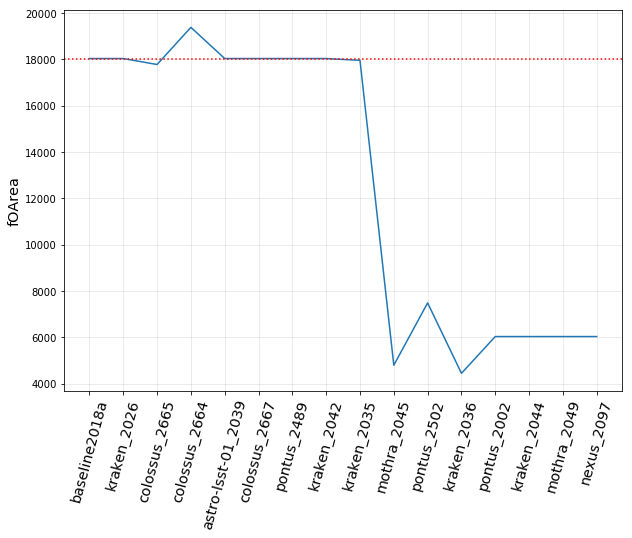

In [9]:
fostats = ['fONv MedianNvis', 'fOArea']
base = [825, 18000]
for f, b in zip(fostats, base):
    plt.figure(figsize=(10, 7))
    s = r.summaryStats[f + ' fO WFD HealpixSlicer']
    plt.plot(rx, s, label=f)
    plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
    plt.ylabel("%s" % f, fontsize='x-large')
    #plt.legend(loc='right', fancybox=True, shadow=True, fontsize='large')
    plt.axhline(b, color='r', linestyle=':')
    plt.grid(True, alpha=0.3)

### Proper Motion Error in WFD

In [10]:
# SRD metrics:
m = r.buildMetricDict(metricNameLike='Proper Motion Error', metricMetadataLike='WFD')
r.addSummaryStats(m)

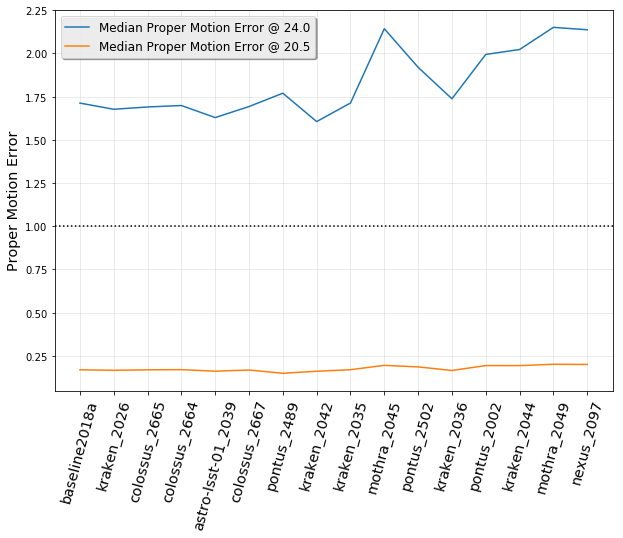

In [11]:
pm = ['Median Proper Motion Error @ 24.0', 'Median Proper Motion Error @ 20.5']
plt.figure(figsize=(10, 7))
for f in pm:
    s = r.summaryStats[f + ' WFD HealpixSlicer']
    plt.plot(rx, s, label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Proper Motion Error", fontsize='x-large')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize='large')
plt.axhline(1, color='k', linestyle=':')
plt.grid(True, alpha=0.3)

### Parallax Error in WFD

In [12]:
# SRD metrics:
m = r.buildMetricDict(metricNameLike='Parallax Error', metricMetadataLike='WFD')
r.addSummaryStats(m)

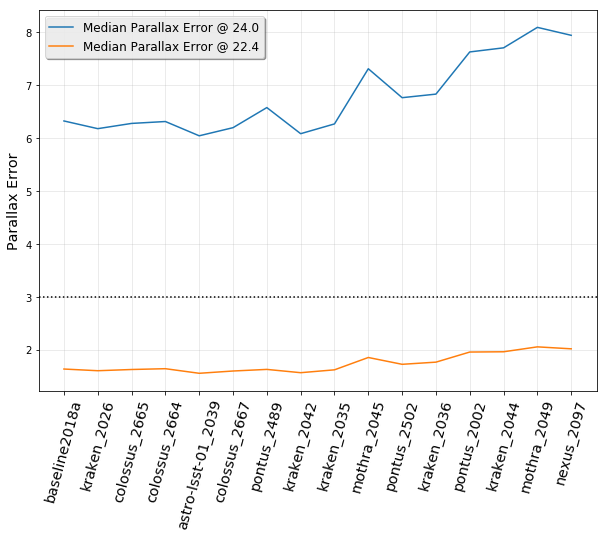

In [13]:
pm = ['Median Parallax Error @ 24.0', 'Median Parallax Error @ 22.4']
plt.figure(figsize=(10, 7))
for f in pm:
    s = r.summaryStats[f + ' WFD HealpixSlicer']
    plt.plot(rx, s, label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Parallax Error", fontsize='x-large')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize='large')
plt.axhline(3, color='k', linestyle=':')
plt.grid(True, alpha=0.3)

### Rapid Revisit in WFD

In [14]:
# SRD metrics:
m = r.buildMetricDict(metricNameLike='RapidRevisit', metricMetadataLike='WFD')
r.addSummaryStats(m)

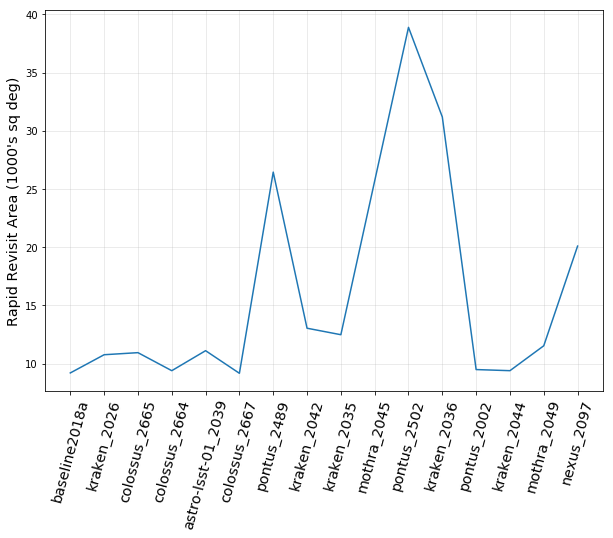

In [15]:
plt.figure(figsize=(10, 7))
s = r.summaryStats['Area (sq deg) RapidRevisits WFD HealpixSlicer']
plt.plot(rx, s/1000, label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Rapid Revisit Area (1000's sq deg)", fontsize='x-large')
#plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize='large')
#plt.axhline(2000, color='k', linestyle=':')
plt.grid(True, alpha=0.3)

### Fraction spent in WFD

In [16]:
# Fraction of time spent on WFD?
m = r.buildMetricDict(metricNameLike='Nvisits', metricMetadataLike='WFD', slicerNameLike='UniSlicer')
r.addSummaryStats(m)

(0.8, 1.0)

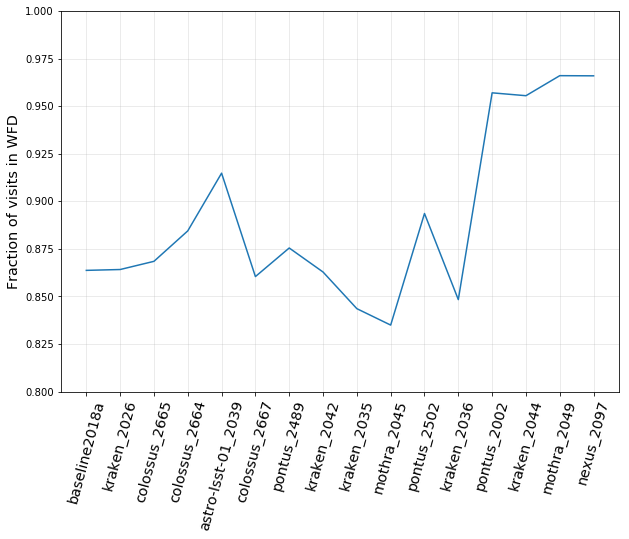

In [17]:
plt.figure(figsize=(10, 7))
s = r.summaryStats['Fraction of total Nvisits WFD']
plt.plot(rx, s, label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Fraction of visits in WFD", fontsize='x-large')
#plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize='large')
#plt.axhline(2000, color='k', linestyle=':')
plt.grid(True, alpha=0.3)
plt.ylim(0.8, 1.0)

### Median Inter-Night Gap in WFD (per filter)

In [18]:
# rolling cadence internight gaps
m = r.buildMetricDict(metricNameLike='Median Inter-Night Gap', metricMetadataLike='WFD')
r.addSummaryStats(m)

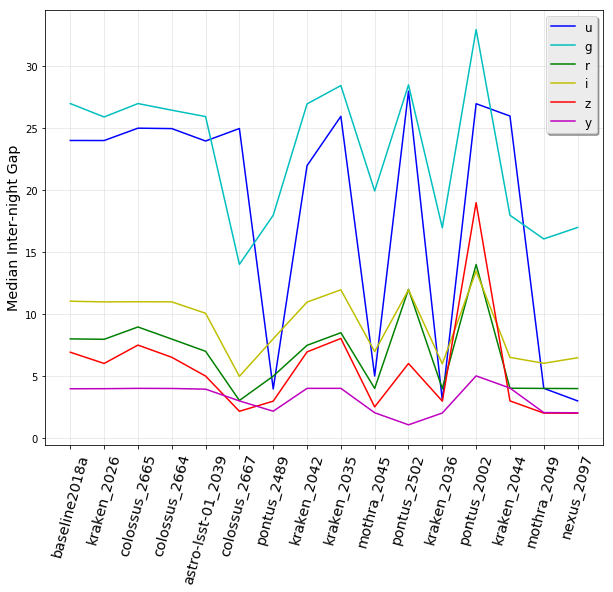

In [19]:
plt.figure(figsize=(10, 8))
for f in filterlist:
    metadata = 'WFD %s band' % f
    s = r.summaryStats['Median Median Inter-Night Gap %s HealpixSlicer' % metadata]
    plt.plot(rx, s, color=filtercolors[f], label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Median Inter-night Gap", fontsize='x-large')
plt.legend(loc='upper right', fancybox=True, shadow=True, fontsize='large')
#base = r.summaryStats['Nvisits All props']['kraken_2026']/100000
#plt.axhline(base, color='r', linestyle=':')
plt.grid(True, alpha=0.3)

### Median Inter-Night Gap in WFD (all filters)

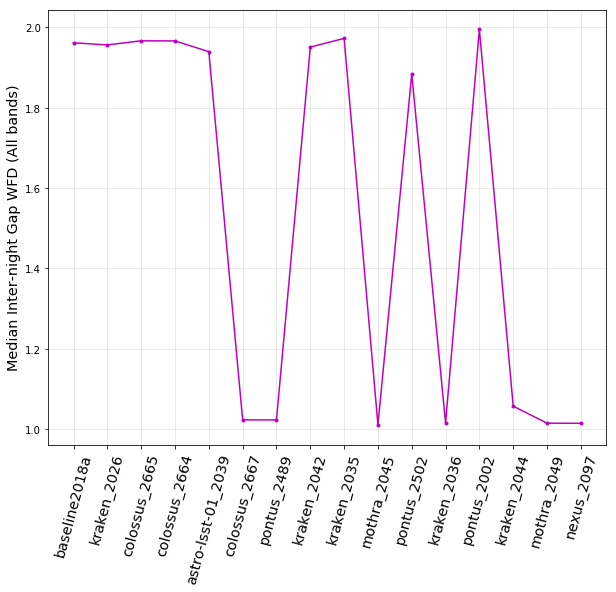

In [20]:
plt.figure(figsize=(10, 8))
metadata = 'WFD all bands' 
s = r.summaryStats['Median Median Inter-Night Gap %s HealpixSlicer' % metadata]
plt.plot(rx, s, marker='.', color=filtercolors[f], label=f)
plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
plt.ylabel("Median Inter-night Gap WFD (All bands)", fontsize='x-large')
#plt.legend(loc='upper right', fancybox=True, shadow=True, fontsize='large')
#base = r.summaryStats['Nvisits All props']['kraken_2026']/100000
#plt.axhline(base, color='r', linestyle=':')
plt.grid(True, alpha=0.3)

In [21]:
# # season length
# m = r.buildMetricDict(metricNameLike='Season Length', metricMetadataLike='WFD')
# r.addSummaryStats(m)

In [22]:
# plt.figure(figsize=(10, 8))
# metadata = 'WFD all bands' 
# s = r.summaryStats['Median Median Season Length %s HealpixSlicer' % metadata]
# plt.plot(rx, s, marker='.', color=filtercolors[f], label=f)
# plt.xticks(rx, r.runlist, rotation=75, fontsize='x-large')
# plt.ylabel("Median Season Length WFD", fontsize='x-large')
# #plt.legend(loc='upper right', fancybox=True, shadow=True, fontsize='large')
# #base = r.summaryStats['Nvisits All props']['kraken_2026']/100000
# #plt.axhline(base, color='r', linestyle=':')
# plt.grid(True, alpha=0.3)

### HA histograms

In [23]:
import lsst.sims.maf.metricBundles as mb
ha = {}
for f in filterlist:
    ha[f] = mb.createEmptyMetricBundle()
    # kraken_2026_HA_Histogram_g_band_ONED
    ha[f].read(os.path.join('kraken_2026', 'all_combine', 'kraken_2026_HA_Histogram_%s_band_ONED.npz' % f))

In [24]:
import lsst.sims.maf.plots as plots

In [25]:
ph = plots.PlotHandler()

In [26]:
ph.setMetricBundles(ha)

1

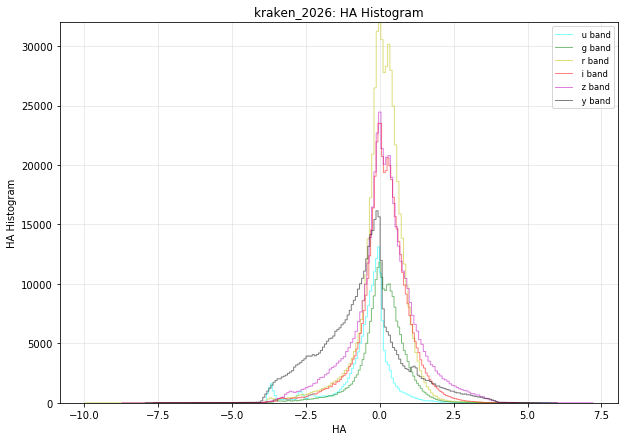

In [27]:
ph.plot(plotFunc=plots.OneDBinnedData(), plotDicts={'yMin': 0, 'yMax':32000, 'figsize': (10, 7)})